**Thinkful - 4.2.2 - Drill - K-means Clustering**

After executing the drill below, I noticed:
* In looking at the cross tab alone, it is difficult to infer which model is better, however, in looking at the graphs of the run time, the minibatch k-means model is much faster than the k-means model. 
* As the k-means model became more complex (by increasing the number of centroids, k), the only issue that arose is that the run time did increase. The increase in run time was not noticeable in this case, but it could become prohibitive if the dataset is large and contains many features. For the minibatch model, there is no obvious trend that the run time increased as k increased.

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

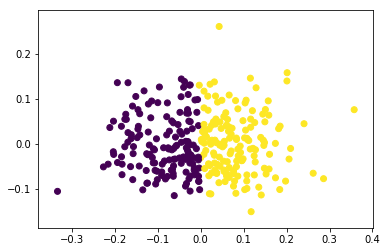

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

**Optimize K-Means**

In [6]:
k_a = []
time_track1 = []

for k in range(10, 50, 10):
    start = time.time()
    
    # Calculate predicted values.
    y_pred = KMeans(n_clusters=k, random_state=42).fit_predict(X_pca)
    stop = time.time()
    print(pd.crosstab(y_pred, y))
    a = stop - start

    k_a.append(k)
    time_track1.append(a) 

print(time.time()-start)

col_0   0   1
row_0        
0      15  11
1       7  34
2      15  24
3       4  20
4      23  20
5      20   6
6      23  18
7      14  21
8       7   6
9      11   4
col_0   0   1
row_0        
0       9  15
1      14   3
2       4   1
3      15   7
4       2   9
5       6  22
6      11   8
7       7  17
8       2  12
9      17  13
10      7   5
11      6  17
12      7   4
13     11   1
14      8   7
15      7   6
16      5  14
17      0   1
18      0   2
19      1   0
col_0   0   1
row_0        
0       1   6
1       8   3
2       3  11
3       5   4
4       6   6
5       1   5
6       3   7
7       9   2
8      14   9
9       4   1
10      9   1
11      7  10
12      4  18
13      7   2
14      0   1
15      2   7
16      1   5
17     10   5
18      0   1
19      1   0
20      0   2
21      6   7
22      5   5
23      5  12
24      9   1
25      4   5
26      3  11
27      4   1
28      5   7
29      3   9
col_0  0   1
row_0       
0      2   9
1      4   1
2      7   6
3      9   

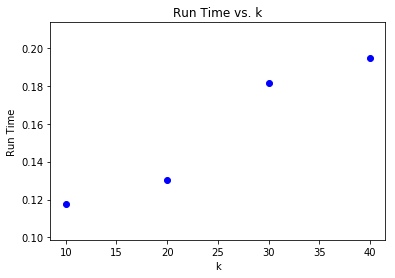

In [7]:
df3 = pd.DataFrame(k_a,columns=['k'])
df3['Run Time'] = pd.Series(time_track1, index=df3.index)

# Look at our data.
plt.scatter(df3['k'],df3['Run Time'],color='blue')
plt.title('Run Time vs. k')
plt.xlabel('k')
plt.ylabel('Run Time')
plt.show()

**Optimize Mini Batch K-means**

In [8]:
k_track = []
time_track = []

for k in range(10, 50, 10):
    start = time.time()

    # Each batch will be made up of 200 data points.
    minibatchkmeans = MiniBatchKMeans(init='random',n_clusters=k,batch_size=200)
    minibatchkmeans.fit(X_pca)

    # Add the new predicted cluster memberships to the data frame.
    predict_mini = minibatchkmeans.predict(X_pca)
    print(pd.crosstab(predict_mini, y))
    stop = time.time()

    # Check the MiniBatch model against our earlier one.
    k_track.append(k)
    a = stop - start
    time_track.append(a)

col_0   0   1
row_0        
0      23  19
1      12   5
2      10   0
3       8  35
4       8  30
5      27  34
6       9   7
7      12   6
8      16  15
9      14  13
col_0   0   1
row_0        
0       5  10
1       9   5
2       6  14
3       4  12
4       8  17
5       7   7
6      11   6
7       5   8
8      10   6
9       4  22
10      0   1
11      9   0
12      2   4
13      5  12
14      8   5
15     12   2
16     10   7
17     16  12
18      2  11
19      6   3
col_0   0   1
row_0        
0       3   6
1       6  12
2       5   4
3       2  11
4       1   6
5       2   1
6       4  14
7       6   5
8       3  10
9       4   1
10      8   5
11      4   5
12      6   0
13      2   8
14      1   0
15      4   4
16      9   5
17      4   3
18      0   4
19     10   1
20      4   8
21      5  19
22      5   1
23      5   2
24      5   6
25      7   4
26      5   5
27      7   3
28      5   8
29      7   3
col_0   0   1
row_0        
0       3   6
1       4   0
2       4   9
3     

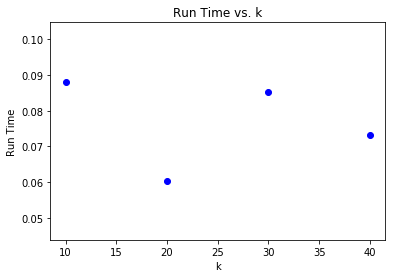

In [10]:
df2 = pd.DataFrame(k_track,columns=['k'])
df2['Run Time'] = pd.Series(time_track, index=df2.index)

# Look at our data.
plt.scatter(df2['k'],df2['Run Time'],color='blue')
plt.title('Run Time vs. k')
plt.xlabel('k')
plt.ylabel('Run Time')
plt.show()